<a href="https://colab.research.google.com/github/Emekaborisama/Topic-modelling-on-bbc-africa-sex4grade-dataset/blob/master/Topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.5MB/s 
     |████████████████████████████████| 552kB 26.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=113a8a9f1264bfa7201722715d8e096a44c3ada25157c39c1bae4f169a4735ef
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=2dd5b3025750fd3553ef3245c0f7f6ceb9be2d72e8481823c58f4f593e3ded76
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pandas as pd
import numpy as np
# Dependencies import
from nltk.corpus import stopwords
import nltk
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:

df = pd.read_csv('BBCAfricaEye_Merged.csv')

In [0]:
df = df.astype(str)

In [0]:
stopwords_en = stopwords.words('english')
    
def clean_tweets(df, column):
    '''Using pandas built-in functions is more performance than python one.
    Remove RT old fashioned characters, urls, special characters and
    apply lower case to tweets.
    '''
    df.loc[:, column] = df[column].str.replace('^RT[\s]+', '')\
                                  .str.replace('https?:\/\/.*[\r\n]*', '')\
                                  .str.replace('[^\w\s]','')\
                                  .str.lower()
            
    return df

def remove_stopwords_from_tweet(tweet):
    return ' '.join(word for word in tweet.split() if word not in stopwords_en)

def filter_stopwords(df, column):
    df.loc[:, column] = df[column].apply(remove_stopwords_from_tweet)
    return df

def clean_tweet_source(df, column):
    df.loc[:, column] = df[column].str.split().str.get(-1)
    return df

In [0]:
# Apply all the cleaning function using pandas pipe.
df.pipe(clean_tweets, 'text')\
  .pipe(filter_stopwords, 'text')

,name,time,text,location
0,paulo,"Oct 16, 2019 5:02 PM",even minister self dont understand sex4grades ...,"Brasília, Brazil"
1,paulo,"Oct 16, 2019 4:54 PM",dem like demselfs den dey keep sex4grades next...,"Brasília, Brazil"
2,Udy Okon,"Oct 16, 2019 3:48 PM",sex4grades menace urgently need address yafng ...,Global Citizen
3,Youth Alive Foundation,"Oct 16, 2019 3:18 PM",youths imitate genevieve personal community na...,Nigeria
4,The One,"Oct 16, 2019 12:39 PM",whatever comittees task forces set derive init...,nan
...,...,...,...,...
99798,•,"Oct 6, 2019 10:36 AM",gamblers like dark side sports betting bbc afr...,"Nairobi, Kenya"
99799,Lydia Namubiru,"Oct 6, 2019 8:49 AM",gig weekend influence people betting know end ...,Kampala Uganda
99800,King 👑 of Motivation 🎙️,"Oct 6, 2019 6:47 AM",beyond sports sort affect peoples attitude tow...,"Kano, Nigeria"
99801,Aliaume Leroy,"Oct 6, 2019 5:49 AM",keep eyes open monday next bbcafricaeye invest...,nan


In [0]:
df.drop(['name',  'time', 'location'], axis=1)

,text
0,even minister self dont understand sex4grades ...
1,dem like demselfs den dey keep sex4grades next...
2,sex4grades menace urgently need address yafng ...
3,youths imitate genevieve personal community na...
4,whatever comittees task forces set derive init...
...,...
99798,gamblers like dark side sports betting bbc afr...
99799,gig weekend influence people betting know end ...
99800,beyond sports sort affect peoples attitude tow...
99801,keep eyes open monday next bbcafricaeye invest...


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
cv = CountVectorizer()


# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['text'])


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

#helper function 
def helper(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                       for i in topic.argsort() [:-n_top_words - 1:-1]]))
        
#tweak parameter

number_topics = 5
number_words = 2

#create and fit lda

lda = LDA(n_components = number_topics, n_jobs = 1)
lda2 = lda.fit(count_data)


#print topics

print("Topics found via LDA:")
helper(lda2, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
sexforgrades boniface

Topic #1:
room cold

Topic #2:
sexforgrades lecturers

Topic #3:
sexforgrades man

Topic #4:
sexforgrades bbcafricaeye


In [0]:
import pyLDAvis.sklearn
 
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda2, count_data, count_vectorizer)
panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.142263 -0.006058       1        1  36.277998
3      0.152068  0.083886       2        1  19.178346
0     -0.133562 -0.201434       3        1  16.755432
4      0.055790 -0.044173       4        1  14.108143
1     -0.216560  0.167779       5        1  13.680080, topic_info=             Term          Freq         Total Category  logprob  loglift
58609        room  11506.000000  11506.000000  Default  30.0000  30.0000
13351        cold  11338.000000  11338.000000  Default  29.0000  29.0000
26572      gyampo   6469.000000   6469.000000  Default  28.0000  28.0000
9824     boniface  13643.000000  13643.000000  Default  27.0000  27.0000
71042      unilag  17319.000000  17319.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
62146    sexually    502.008542   2022.181733   Topic5  -5.7270   0.5959
62111      sexual    554.647778   3771.851038   Topic5  -5.6273   0.0722
71393  university    554.918432   4791.391876   Topic5  -5.6268  -0.1665
68333        time    514.808839   2898.551848   Topic5  -5.7018   0.2611
17183         dey    472.922349   2532.910546   Topic5  -5.7867   0.3110

[398 rows x 6 columns], token_table=       Topic      Freq                 Term
term                                       
2495       3  0.912952          abdulkareem
2495       4  0.086017          abdulkareem
2754       1  0.937063                abuse
2754       2  0.045489                abuse
2754       3  0.009098                abuse
...      ...       ...                  ...
75709      2  0.984115  younganddepressedke
75753      1  0.159615                youre
75753      2  0.755205                youre
75753      3  0.012769                youre
75753      4  0.071143                youre

[809 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 5, 2])

**With Genism**





In [0]:

df2 = df
df2.drop(['name',  'time', 'location'], axis=1, inplace = True)

In [0]:
df2['text']


0        even minister self dont understand sex4grades ...
1        dem like demselfs den dey keep sex4grades next...
2        sex4grades menace urgently need address yafng ...
3        youths imitate genevieve personal community na...
4        whatever comittees task forces set derive init...
                               ...                        
99798    gamblers like dark side sports betting bbc afr...
99799    gig weekend influence people betting know end ...
99800    beyond sports sort affect peoples attitude tow...
99801    keep eyes open monday next bbcafricaeye invest...
99802    latest bbcafricaeye exposes big multinational ...
Name: text, Length: 99803, dtype: object

In [0]:
df2 = df2['text'].values.tolist()

In [0]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(
 min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [0]:
def make_biagram(texts):
  return [bigram_mod[doc] for doc in texts]

def make_trigram(texts):
  return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lammatization(texts, allow_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']):
  texts_out = []
  for sent in texts:
    doc = nlp("". join(sent))
    texts_out.append(token.lemma_ for token in doc if token.pos_ in allow_postags)
    return texts_out

nlp = spacy.load('en', disable=['parser', 'ner'])

In [0]:
df2_biagram = make_biagram(df2)

In [0]:
df2_lemma = lammatization(df2_biagram, allow_postags=['NOUN', 'ADJ', 'VERB', 'ADV'] )

In [0]:
id2word  = corpora.Dictionary(df2_lemma)
texts  = df2_lemma
corpus = [id2word.doc2bow(texts) for text in texts]

In [0]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:804: RuntimeWarning: divide by zero encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:804: RuntimeWarning: in

In [0]:
from pprint import pprint 
 
 # Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.056*"show" + 0.056*"sex4grade" + 0.056*"understand" + 0.056*"tool" + '
  '0.056*"think" + 0.056*"talk" + 0.056*"still" + 0.056*"sign" + 0.056*"beat" '
  '+ 0.056*"shop"'),
 (1,
  '0.056*"show" + 0.056*"sex4grade" + 0.056*"understand" + 0.056*"tool" + '
  '0.056*"think" + 0.056*"talk" + 0.056*"still" + 0.056*"sign" + 0.056*"beat" '
  '+ 0.056*"shop"'),
 (2,
  '0.056*"show" + 0.056*"sex4grade" + 0.056*"understand" + 0.056*"tool" + '
  '0.056*"think" + 0.056*"talk" + 0.056*"still" + 0.056*"sign" + 0.056*"beat" '
  '+ 0.056*"shop"'),
 (3,
  '0.056*"show" + 0.056*"sex4grade" + 0.056*"understand" + 0.056*"tool" + '
  '0.056*"think" + 0.056*"talk" + 0.056*"still" + 0.056*"sign" + 0.056*"beat" '
  '+ 0.056*"shop"'),
 (4,
  '0.056*"show" + 0.056*"sex4grade" + 0.056*"understand" + 0.056*"tool" + '
  '0.056*"think" + 0.056*"talk" + 0.056*"still" + 0.056*"sign" + 0.056*"beat" '
  '+ 0.056*"shop"'),
 (5,
  '0.056*"show" + 0.056*"sex4grade" + 0.056*"understand" + 0.056*"tool" + '
  '0.056*

In [0]:
print('\n perplexity:', lda_model.log_perplexity(corpus))



 perplexity: nan


/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:804: RuntimeWarning: invalid value encountered in double_scalars
  perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)


In [0]:
import pyLDAvis.gensim 
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis


PreparedData(topic_coordinates=         x    y  topics  cluster  Freq
topic                                 
0      0.0  0.0       1        1   NaN
1      0.0  0.0       2        1   NaN
2      0.0  0.0       3        1   NaN
3      0.0  0.0       4        1   NaN
4      0.0  0.0       5        1   NaN
5      0.0  0.0       6        1   NaN
6      0.0  0.0       7        1   NaN
7      0.0  0.0       8        1   NaN
8      0.0  0.0       9        1   NaN
9      0.0  0.0      10        1   NaN
10     0.0  0.0      11        1   NaN
11     0.0  0.0      12        1   NaN
12     0.0  0.0      13        1   NaN
13     0.0  0.0      14        1   NaN
14     0.0  0.0      15        1   NaN
15     0.0  0.0      16        1   NaN
16     0.0  0.0      17        1   NaN
17     0.0  0.0      18        1   NaN
18     0.0  0.0      19        1   NaN
19     0.0  0.0      20        1   NaN, topic_info=          Term  Freq  Total Category  logprob  loglift
0         beat   0.0    0.0  Default  18.0000     18.0
1         even   0.0    0.0  Default  17.0000     17.0
2         lady   0.0    0.0  Default  16.0000     16.0
3        maybe   0.0    0.0  Default  15.0000     15.0
4        never   0.0    0.0  Default  14.0000     14.0
..         ...   ...    ...      ...      ...      ...
13        talk   0.0    0.0  Topic20  -2.8904      NaN
14       think   0.0    0.0  Topic20  -2.8904      NaN
15        tool   0.0    0.0  Topic20  -2.8904      NaN
16  understand   0.0    0.0  Topic20  -2.8904      NaN
17     useless   0.0    0.0  Topic20  -2.8904      NaN

[378 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=18, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

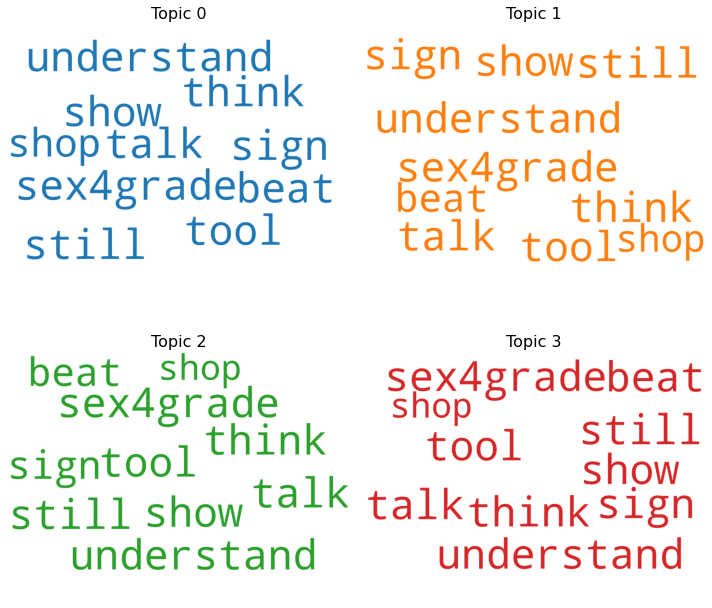

In [0]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab12',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [0]:
topics = lda_model.show_topics(formatted=False)

In [0]:
topics

[(0,
  [('show', 0.055555556),
   ('sex4grade', 0.055555556),
   ('understand', 0.055555556),
   ('tool', 0.055555556),
   ('think', 0.055555556),
   ('talk', 0.055555556),
   ('still', 0.055555556),
   ('sign', 0.055555556),
   ('beat', 0.055555556),
   ('shop', 0.055555556)]),
 (1,
  [('show', 0.055555556),
   ('sex4grade', 0.055555556),
   ('understand', 0.055555556),
   ('tool', 0.055555556),
   ('think', 0.055555556),
   ('talk', 0.055555556),
   ('still', 0.055555556),
   ('sign', 0.055555556),
   ('beat', 0.055555556),
   ('shop', 0.055555556)]),
 (13,
  [('show', 0.055555556),
   ('sex4grade', 0.055555556),
   ('understand', 0.055555556),
   ('tool', 0.055555556),
   ('think', 0.055555556),
   ('talk', 0.055555556),
   ('still', 0.055555556),
   ('sign', 0.055555556),
   ('beat', 0.055555556),
   ('shop', 0.055555556)]),
 (12,
  [('show', 0.055555556),
   ('sex4grade', 0.055555556),
   ('understand', 0.055555556),
   ('tool', 0.055555556),
   ('think', 0.055555556),
   ('talk',